## MMSB: Movies, user 1

In [1]:
from IPython.core.debugger import Tracer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb

%matplotlib inline
matplotlib.style.use('ggplot')
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/movie_lens/ml100k_train.csv', header=None)
names = pd.read_table('../data/movie_lens/ml-100k/u.item', header=None, sep='|')[1]
data[0] = data[0] - 1 # 0-index
data[1] = data[1] - 1

In [3]:
test = pd.read_csv('../data/movie_lens/ml100k_heldout.csv', header=None)
test[0] = test[0] - 1 # 0-index
test[1] = test[1] - 1

In [4]:
data = data[data[3] == 1] # Consider user 1 only
test = test[test[3] == 1] # Consider user 1 only

In [5]:
X = data[[0,1,2]].values
X.shape

(1499, 3)

In [6]:
test_X = test[[0,1,2]].values
test_X.shape

(369, 3)

# K=5

0:00:14.325438


(-693.7129135704206, -693.71291357042151)

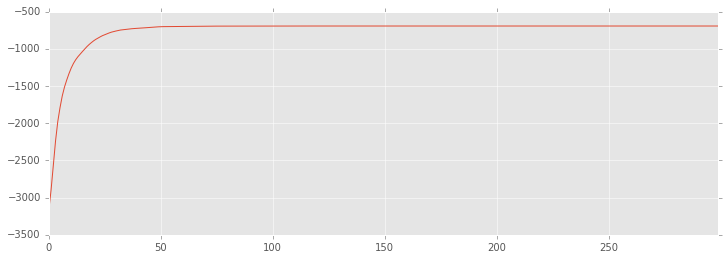

In [11]:
K = 5
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

In [12]:
pd.DataFrame(B).round(5)

,0,1,2,3,4
0,0.5,0.0,0.0,0.0,0.0
1,1.0,0.5,0.0,1.0,0.0
2,1.0,1.0,0.5,1.0,0.0
3,1.0,0.0,0.0,0.5,0.0
4,1.0,1.0,1.0,1.0,0.5


In [14]:
probs = [gamma[:,p].dot(B).dot(gamma[:,q]) for p, q, v in test_X]
sum(test_X[:,2] == np.round(probs)) / float(len(test_X))

0.98644986449864502

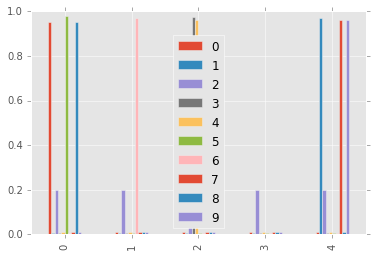

In [15]:
pd.DataFrame(gamma[:,:10]).plot(kind='bar')